# Chart 1: number of songs on billboard vs probability of collaborating within community

## import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## load data

In [2]:
# get working directory
wd = os.getcwd()
wd

'/Users/Isabella/Desktop/isa_NA_FTP'

In [3]:
# %% load billboard chart
# join path
infile = os.path.join(wd, 'dataset', 'r-b-hip-hop-songs.csv')

# select relevant columns
col = ['title', 'artist', 'weeks', 'peak']

# read csv file & save as data frame
song_df = pd.read_csv(infile, usecols = col)

# reorder columns
song_df = song_df[['artist', 'title', 'peak', 'weeks']]

# drop duplicates & keep the last record
song_df = song_df.drop_duplicates(subset = ['artist', 'title'], keep = 'last')
song_df = song_df.reset_index(drop = True)
song_df

,artist,title,peak,weeks
0,Tay-K,The Race,17,22
1,Huncho Jack,Black & Chinese,31,1
2,Huncho Jack,Huncho Jack,38,1
3,Huncho Jack,Motorcycle Patches,39,1
4,Huncho Jack,Saint,40,1
...,...,...,...,...
1235,DJ Chose Featuring BeatKing,Thick,33,2
1236,Kid LAROI & Juice WRLD,Go!,22,9
1237,Saweetie Featuring Jhene Aiko,Back To The Streets,29,3
1238,Mulatto Featuring Gucci Mane,Muwop,40,6


In [4]:
# %% load par_df data
# join path & save as artist_df
infile = os.path.join(wd, 'par_df.csv')
artist_df = pd.read_csv(infile, index_col=0)
artist_df

,artist,community,num_neighbors,num_similar_neighbor,num_nonsimilar_neighbor,prob_similar,centrality
0,Nas,0,38.0,28.0,10.0,0.736842,0.129252
1,Young Dolph,1,28.0,15.0,13.0,0.535714,0.095238
2,Ciara,0,12.0,9.0,3.0,0.750000,0.040816
3,Skylar Grey,0,4.0,4.0,0.0,1.000000,0.013605
4,Playboi Carti,1,22.0,12.0,10.0,0.545455,0.074830
...,...,...,...,...,...,...,...
290,Bruno Mars,2,6.0,1.0,5.0,0.166667,0.020408
291,Kendrick Lamar,0,49.0,34.0,15.0,0.693878,0.166667
292,Jaden,0,6.0,5.0,1.0,0.833333,0.020408
293,ScHoolboy Q,0,39.0,24.0,15.0,0.615385,0.132653


# Get collaborated / individual songs

In [5]:
# categorize each song & artist with individual / collaborated
song_df.loc[:, 'type'] = 'individual'

for i in song_df.index:
    artist = song_df.loc[i, 'artist']
    artist = artist.split()
    if 'Featuring' in artist:
        song_df.loc[i, 'type'] = 'collaborated'
    elif '&' in artist:
        song_df.loc[i, 'type'] = 'collaborated'
    elif 'X' in artist:
        song_df.loc[i, 'type'] = 'collaborated'
    elif 'featuring' in artist:
        song_df.loc[i, 'type'] = 'collaborated'
    elif 'with' in artist:
        song_df.loc[i, 'type'] = 'collaborated'
    elif '+' in artist:
        song_df.loc[i, 'type'] = 'collaborated'
    for j in artist:
        if j[-1] == ',':
            song_df.loc[i, 'type'] = 'collaborated'
song_df

,artist,title,peak,weeks,type
0,Tay-K,The Race,17,22,individual
1,Huncho Jack,Black & Chinese,31,1,individual
2,Huncho Jack,Huncho Jack,38,1,individual
3,Huncho Jack,Motorcycle Patches,39,1,individual
4,Huncho Jack,Saint,40,1,individual
...,...,...,...,...,...
1235,DJ Chose Featuring BeatKing,Thick,33,2,collaborated
1236,Kid LAROI & Juice WRLD,Go!,22,9,collaborated
1237,Saweetie Featuring Jhene Aiko,Back To The Streets,29,3,collaborated
1238,Mulatto Featuring Gucci Mane,Muwop,40,6,collaborated


In [6]:
# get collaborated song only
coll_song_df_1 = song_df[song_df['type'] == 'collaborated'].reset_index(drop = True)
coll_song_df_1

,artist,title,peak,weeks,type
0,Eminem Featuring Beyonce,Walk On Water,6,7,collaborated
1,Huncho Jack Featuring Offset,Dubai Shit,35,2,collaborated
2,Calvin Harris Featuring Kehlani & Lil Yachty,Faking It,38,8,collaborated
3,Migos & Marshmello,Danger,34,3,collaborated
4,Huncho Jack Featuring Takeoff,Eye 2 Eye,27,3,collaborated
...,...,...,...,...,...
547,DJ Chose Featuring BeatKing,Thick,33,2,collaborated
548,Kid LAROI & Juice WRLD,Go!,22,9,collaborated
549,Saweetie Featuring Jhene Aiko,Back To The Streets,29,3,collaborated
550,Mulatto Featuring Gucci Mane,Muwop,40,6,collaborated


In [7]:
# save it as csv file
coll_song_df_1.to_csv('coll_song.csv', index = False)

In [8]:
artist_df

,artist,community,num_neighbors,num_similar_neighbor,num_nonsimilar_neighbor,prob_similar,centrality
0,Nas,0,38.0,28.0,10.0,0.736842,0.129252
1,Young Dolph,1,28.0,15.0,13.0,0.535714,0.095238
2,Ciara,0,12.0,9.0,3.0,0.750000,0.040816
3,Skylar Grey,0,4.0,4.0,0.0,1.000000,0.013605
4,Playboi Carti,1,22.0,12.0,10.0,0.545455,0.074830
...,...,...,...,...,...,...,...
290,Bruno Mars,2,6.0,1.0,5.0,0.166667,0.020408
291,Kendrick Lamar,0,49.0,34.0,15.0,0.693878,0.166667
292,Jaden,0,6.0,5.0,1.0,0.833333,0.020408
293,ScHoolboy Q,0,39.0,24.0,15.0,0.615385,0.132653


In [14]:
artist_df.loc[:, 'num'] = 0

for i in artist_df.index:
    name = str(artist_df.loc[i, 'artist'])
    num = 0
    weeks = []
    peak = []
    for j in coll_song_df_1.index:
        names = str(coll_song_df_1.loc[j, 'artist'])
        if name in names:
            num += 1
            weeks.append(coll_song_df_1.loc[j, 'weeks'])
            peak.append(coll_song_df_1.loc[j, 'peak'])
    weeks_mean = np.mean(weeks)
    peak_mean = np.mean(peak)
    artist_df.loc[i, 'num'] = num
    artist_df.loc[i, 'weeks_mean'] = weeks_mean
    artist_df.loc[i, 'peak_mean'] = peak_mean
    
artist_df

/Users/Isabella/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Isabella/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,artist,community,num_neighbors,num_similar_neighbor,num_nonsimilar_neighbor,prob_similar,centrality,num,weeks_mean,peak_mean
0,Nas,0,38.0,28.0,10.0,0.736842,0.129252,5,16.000000,20.000000
1,Young Dolph,1,28.0,15.0,13.0,0.535714,0.095238,2,3.500000,42.500000
2,Ciara,0,12.0,9.0,3.0,0.750000,0.040816,0,NaN,NaN
3,Skylar Grey,0,4.0,4.0,0.0,1.000000,0.013605,1,1.000000,29.000000
4,Playboi Carti,1,22.0,12.0,10.0,0.545455,0.074830,5,4.000000,31.600000
...,...,...,...,...,...,...,...,...,...,...
290,Bruno Mars,2,6.0,1.0,5.0,0.166667,0.020408,3,22.666667,2.333333
291,Kendrick Lamar,0,49.0,34.0,15.0,0.693878,0.166667,10,13.100000,20.500000
292,Jaden,0,6.0,5.0,1.0,0.833333,0.020408,1,1.000000,48.000000
293,ScHoolboy Q,0,39.0,24.0,15.0,0.615385,0.132653,3,3.000000,27.333333


In [15]:
# save it as performance.csv
artist_df.to_csv('performance.csv', index = False)

# chart 1: number of charts on Billboard vs homophily

In [21]:
# select only those present in the billboard chart
artist_df = artist_df[artist_df['num'] > 0]

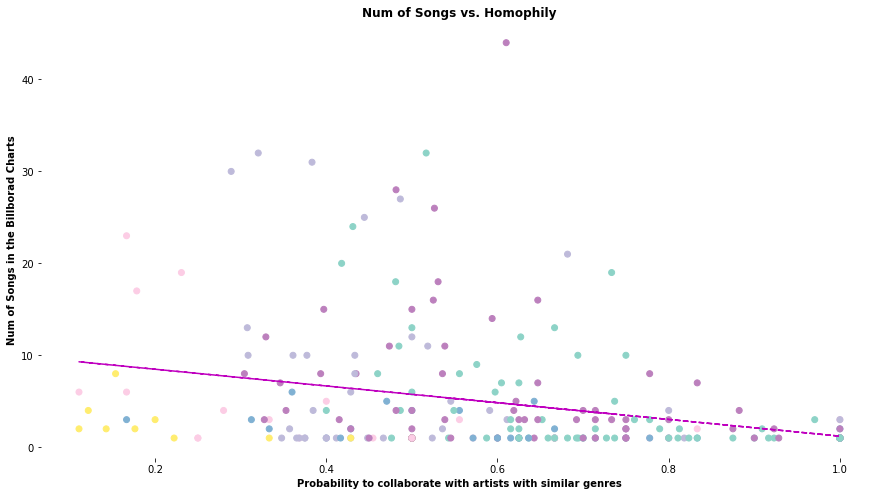

In [22]:
# set figure
fig1 = plt.figure(figsize = (15, 8))

# add plot
ax1 = fig1.add_subplot(111)

# set cmap
cmap = cm.get_cmap('Set3', max(list(artist_df['community'])) + 1)

# add x & y data, color
ax1.scatter(artist_df['prob_similar'], artist_df['num'],
            cmap = cmap, c = artist_df['community'])

# add trendline of significant commuity
z = np.polyfit(artist_df['prob_similar'], artist_df['num'], 1)
p = np.poly1d(z)
plt.plot(artist_df['prob_similar'],p(artist_df['prob_similar']),'m--')

# remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

# add labels
ax1.set_xlabel('Probability to collaborate with artists with similar genres',
               fontweight = 'bold')
ax1.set_ylabel('Num of Songs in the Billborad Charts', fontweight = 'bold')
ax1.set_title('Num of Songs vs. Homophily', fontweight = 'bold')

# save figure
plt.savefig('Num_vs_Homophily.png')

# chart 2: average weeks vs homophily

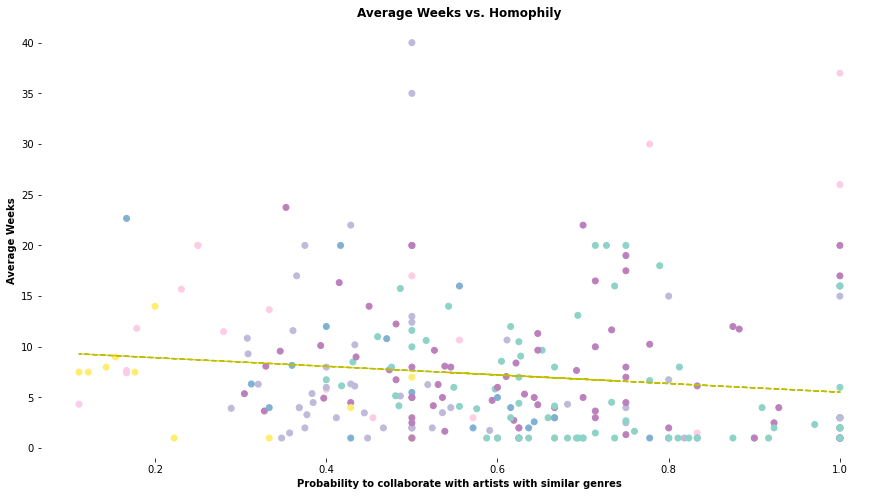

In [28]:
# set figure
fig2 = plt.figure(figsize = (15, 8))

# add plots
ax2 = fig2.add_subplot(111)

# add x & y data, color
ax2.scatter(artist_df['prob_similar'], artist_df['weeks_mean'],
            cmap = cmap, c = artist_df['community'])

# add trendline of significant commuity
z = np.polyfit(artist_df['prob_similar'], artist_df['weeks_mean'], 1)
p = np.poly1d(z)
plt.plot(artist_df['prob_similar'],p(artist_df['prob_similar']),'y--')

# remove spines
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

# set labels
ax2.set_xlabel('Probability to collaborate with artists with similar genres',
               fontweight = 'bold')
ax2.set_ylabel('Average Weeks', fontweight = 'bold')
ax2.set_title('Average Weeks vs. Homophily', fontweight = 'bold')

# save figure
plt.savefig('Weeks_vs_Homophily.png')

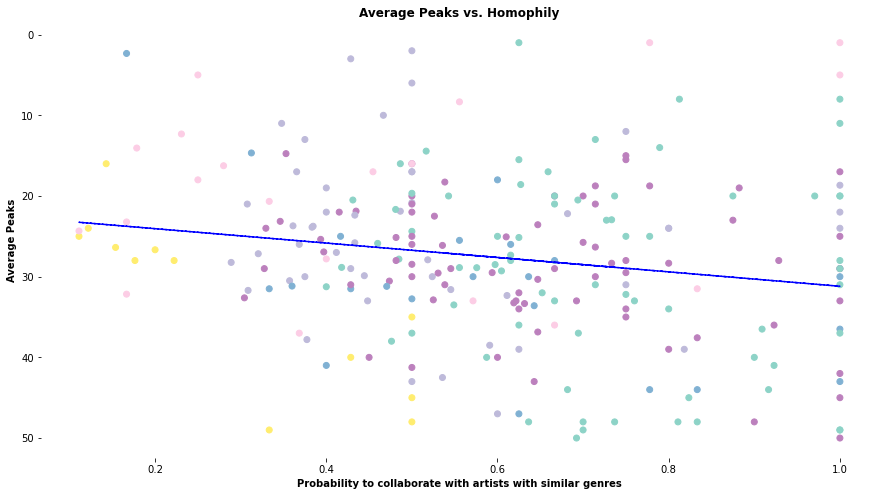

In [33]:
# set figure
fig3 = plt.figure(figsize = (15, 8))

# add plots
ax3 = fig3.add_subplot(111)

# add x & y data, color
ax3.scatter(artist_df['prob_similar'], artist_df['peak_mean'],
            cmap = cmap, c = artist_df['community'])

# add trendline of significant commuity
z = np.polyfit(artist_df['prob_similar'], artist_df['peak_mean'], 1)
p = np.poly1d(z)
plt.plot(artist_df['prob_similar'],p(artist_df['prob_similar']),'b--')

# reverse the order of y-axis 
plt.gca().invert_yaxis()

# remove spines
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)

# set labels
ax3.set_xlabel('Probability to collaborate with artists with similar genres',
               fontweight = 'bold')
ax3.set_ylabel('Average Peaks', fontweight = 'bold')
ax3.set_title('Average Peaks vs. Homophily', fontweight = 'bold')


# save figure
plt.savefig('Peaks_vs_Homophily.png')